In [ ]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

def make_plummer_model(N, mass, scale_radius):
    particles = []
    for _ in range(N):
        X = np.random.random()
        r = scale_radius / np.sqrt(X**(-2/3) - 1)
        phi = 2 * np.pi * np.random.random()
        costheta = 2 * np.random.random() - 1
        sintheta = np.sqrt(1 - costheta**2)
        x = r * sintheta * np.cos(phi)
        y = r * sintheta * np.sin(phi)
        z = r * costheta
        particles.append(rebound.Particle(x=x, y=y, z=z, m=mass/N))
    return particles

def compute_potential(xg, yg, particles):
    # Compute the potential at each grid point due to all particles
    phi = np.zeros_like(xg)
    for p in particles:
        dx = xg - p.x
        dy = yg - p.y
        r = np.sqrt(dx**2 + dy**2) + 1e-2  # softening to avoid singularity
        phi -= p.m / r
    return phi

# Set up simulation and galaxies
sim = rebound.Simulation()
sim.collision = "direct"
sim.G = 1.0
sim.integrator = "leapfrog"
sim.dt = 0.15
sim.softening = 0.1
sim.collision_resolve = "merge"

nsmall = 1000
nlarge = 3000
nt = nsmall + nlarge
galaxy1 = make_plummer_model(nlarge, mass=3, scale_radius=1.0)
galaxy2 = make_plummer_model(nsmall, mass=1.0, scale_radius=0.8)
for p in galaxy1:
    p.x -= 5.0
    p.vx = 1.5
    p.y -= 5.0
    p.vy = 1.5
for p in galaxy2:
    p.x += 5.0
    p.vx = -1.5
    p.y += 5.0
    p.vy = -1.5
sim.add(galaxy1)
sim.add(galaxy2)


# Make a grid for the field
x = np.linspace(-30, 30, 100)
y = np.linspace(-30, 30, 100)
xg, yg = np.meshgrid(x, y)

# Compute potential fields for each galaxy
phi1 = compute_potential(xg, yg, galaxy1)
phi2 = compute_potential(xg, yg, galaxy2)

#sim.widget(size=(400,400)) # what rebound produces
for i in range(101):
    #fig, ax = plt.subplots()
    sim.integrate(sim.t + 0.1)
    # Get current particle positions and masses
    particles = sim.particles

    # Recompute the potential field using all current particles
    phi = compute_potential(xg, yg, particles)

    # Plot the updated potential field
    #cont = ax.contour(xg, yg, phi, levels=10, cmap='jet', alpha=0.5)

    # Plot the particles
    x_all = [p.x for p in particles]
    y_all = [p.y for p in particles]
    # ax.scatter(x_all[:3000], y_all[:3000], s=2, color='Blue', label='Galaxy 1')
    # ax.scatter(x_all[3000:], y_all[3000:], s=2, color='Red', label='Galaxy 2')
    

    # ax.set_xlim(-10, 10)
    # ax.set_ylim(-10, 10)
    # ax.set_title(f"Time: {sim.t:.2f}")
    

print(f"Time: {sim.t:.2f}")

Time: 10.10


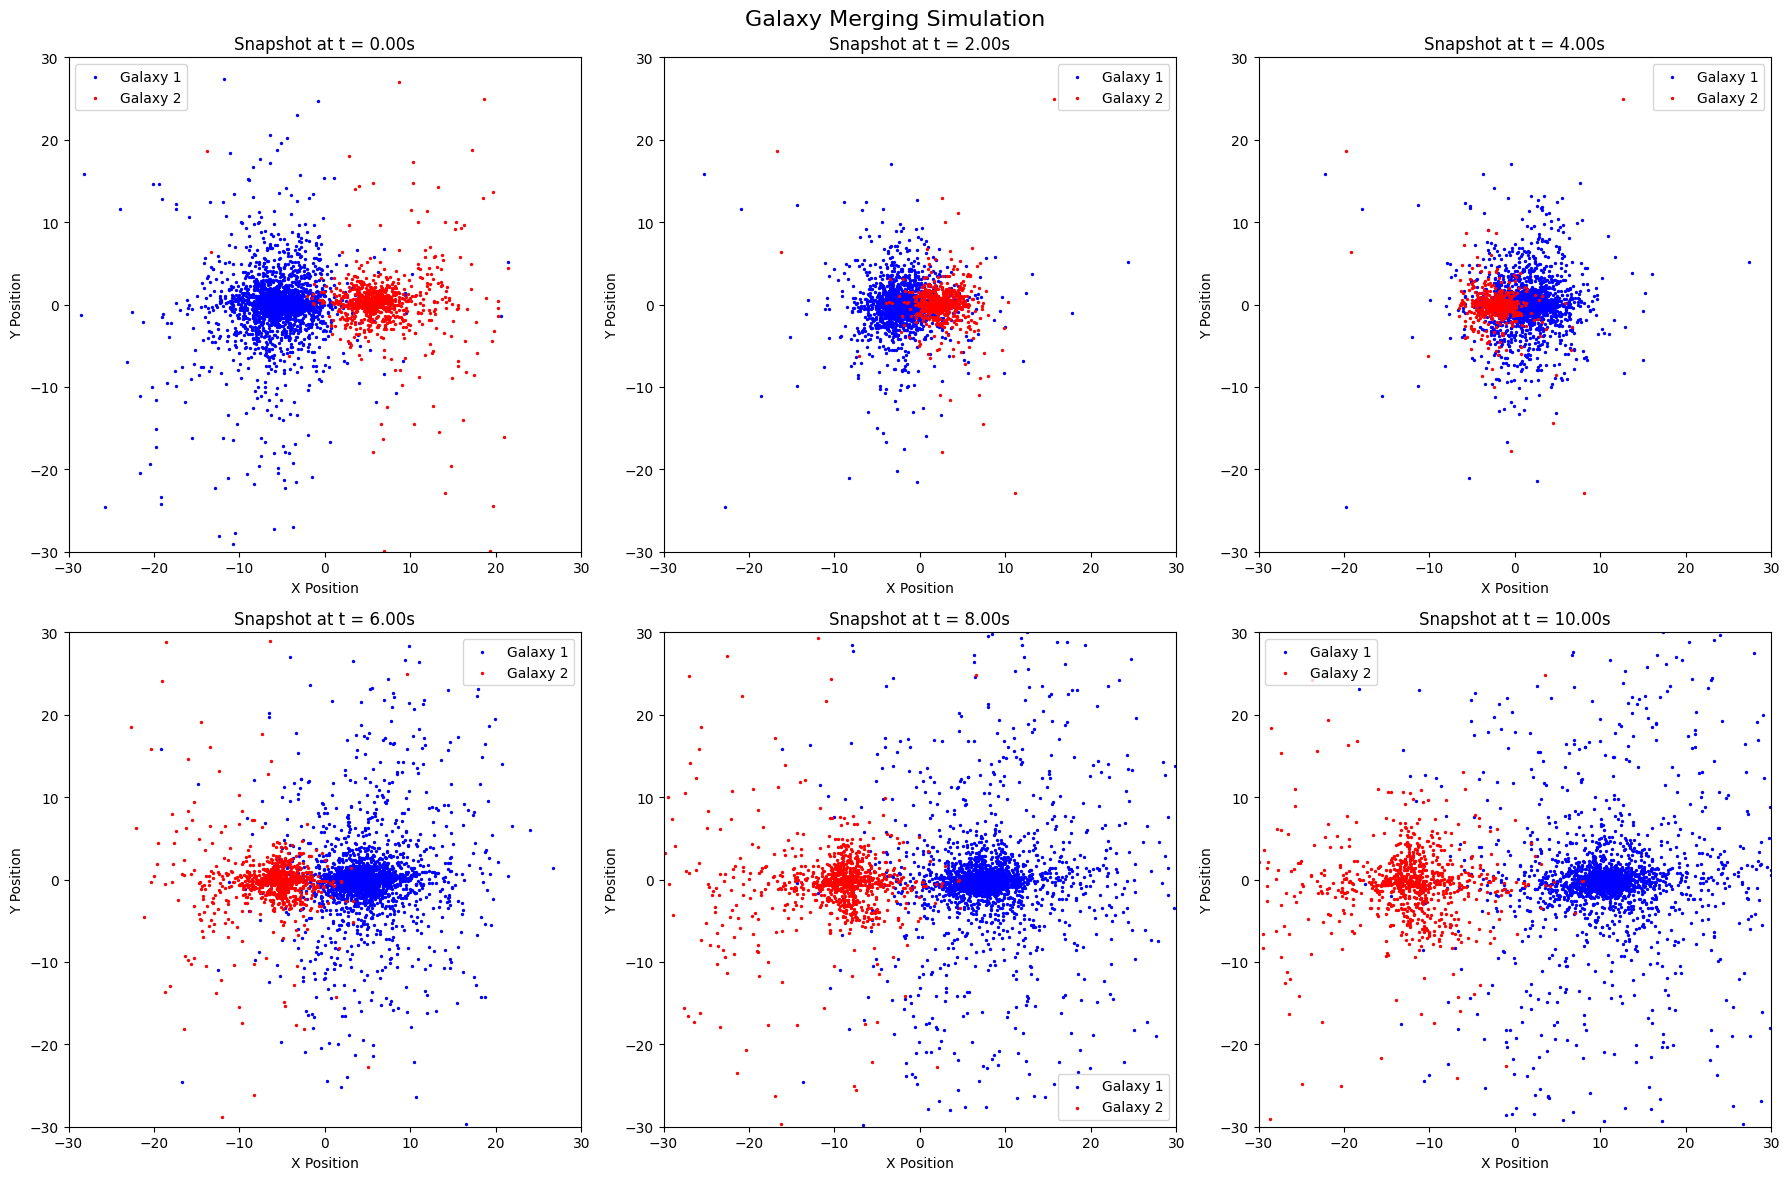

In [38]:
timestep = [1,2,3,4,5]
frames = timestep*20
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
ax = ax.flatten()
snapshot_times = [0,2,4,6,8,10]

for i in range(len(snapshot_times)):
    sim.integrate(snapshot_times[i])  # Integrate directly to the desired time
    particles = sim.particles
    x_all = [p.x for p in particles]
    y_all = [p.y for p in particles]
    phi = compute_potential(xg, yg, particles)
    ax[i].scatter(x_all[:3000], y_all[:3000], s=2, color='Blue', label='Galaxy 1')
    ax[i].scatter(x_all[3000:], y_all[3000:], s=2, color='Red', label='Galaxy 2')
    #cont = ax[i].contour(xg, yg, phi, levels=10, cmap='jet', alpha=0.5) # the magnetic field lines are getting messed up at the different scaling
    ax[i].set_xlim(-30, 30)
    ax[i].set_ylim(-30, 30)
    ax[i].set_title(f"Snapshot at t = {sim.t:.2f}s") # timescale based on integration
    ax[i].set_xlabel("X Position")
    ax[i].set_ylabel("Y Position")
    ax[i].legend()

fig.suptitle("Galaxy Merging Simulation", fontsize=16)
fig.tight_layout()

plt.savefig("galaxy_merging_simulation.png", dpi=300)

In [1]:
import rebound
print(rebound.__version__)

4.4.8
